### 2次元フィルターで手書き数字のエッジを抽出してみる

In [2]:
# tensorflowのインポート
import tensorflow as tf

# MNISTデータセットの読み込み
(x_trains, y_trains), (x_tests, y_tests) = tf.keras.datasets.mnist.load_data()

# 訓練データ
# (60000, 28, 28)の3階テンソルを(60000, 28, 28, 1)の4階テンソルに変換
x_trains = x_trains.reshape(60000, 28, 28, 1)
# 訓練データをfloat32に変換
x_trains = x_trains.astype('float32')
# データを255で割って0から1.0の範囲に変換
x_trains /= 255

In [3]:
import numpy as np
# 縦方向のエッジを検出するフィルター
vertical_edge_fil = np.array([
    [-2, 1, 1],
    [-2, 1, 1],
    [-2, 1, 1],
], dtype=float)

# 横方向のエッジを検出するフィルター
horizontal_edge_fil = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [-2, -2, -2],
], dtype=float)

In [4]:
# フィルターを適用する画像のインデックス
img_id = 42
# 画像のピクセル値を取得
img_x = x_trains[img_id, :, :, 0]
img_height = 28
img_width = 28
# 画像データを28*28の行列に変換
img_x = img_x.reshape(img_height, img_width)
# 縦エッジのフィルター適用後の値を代入する行列を用意
vertical_edge = np.zeros_like(img_x)
# 横エッジのフィルター適用後の値を代入する行列を用意
horizontal_edge = np.zeros_like(img_x)

# 3*3のフィルターを適用
for h in range(img_height - 3):
    for w in range(img_width - 3):
        # フィルターを適用する領域を取得
        img_region = img_x[h:h + 3, w:w + 3]
        # 縦エッジのフィルターを適用
        vertical_edge[h + 1, w + 1] = np.dot(
            # 画像のピクセル値を1次元の配列に変換
            img_region.reshape(-1),
            # 縦エッジのフィルターを1次元の配列に変換
            vertical_edge_fil.reshape(-1)
        )
        # 横エッジのフィルターを適用
        horizontal_edge[h + 1, w + 1] = np.dot(
            # 画像のピクセル値を1次元の配列に変換
            img_region.reshape(-1),
            # 横エッジのフィルターを1次元の配列に変換
            horizontal_edge_fil.reshape(-1)
        )

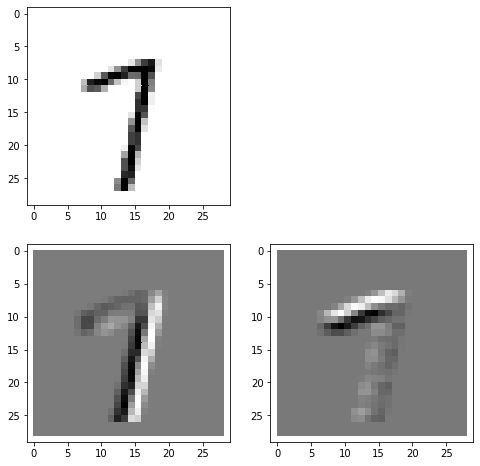

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# プロットエリアのサイズを設定
plt.figure(figsize=(8, 8))
# プロット図を縮小して図の間のスペースを空ける
plt.subplots_adjust(wspace=0.2)
plt.gray()

# 2*2のグリッドの上段左に元の画像をプロット
plt.subplot(2, 2, 1)
# 色相を反転させてプロットする
plt.pcolor(1 - img_x)
plt.xlim(-1, 29)
plt.ylim(29, -1)

# 2*2のグリッドの下段左に縦エッジ適用後をプロット
plt.subplot(2, 2, 3)
# 色相を反転させてプロットする
plt.pcolor(-vertical_edge)
plt.xlim(-1, 29)
plt.ylim(29, -1)

# 2*2のグリッドの下段右に横エッジ適用後をプロット
plt.subplot(2, 2, 4)
# 色相を反転させてプロットする
plt.pcolor(-horizontal_edge)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

### Kerasスタイルによる畳み込むニューラルネットワーク（CNN）の構築

In [ ]:
'''
1. データの用意と前処理
'''
# Fashion-MNISTデータセットをインポート
from tensorflow.keras.datasets import fashion_mnist

# MNISTデータセットの読み込み
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 訓練データ
# (60000, 28, 28)の3階テンソルを(60000, 28, 28, 1)の4階テンソルに変換
x_train = x_train.reshape(-1, 28, 28, 1)
# 訓練データをfloat32に変換
x_train = x_train.astype('float32')
# データを255で割って0から1.0の範囲に変換
x_train /= 255

# テストデータ
# (60000, 28, 28)の3階テンソルを(60000, 28, 28, 1)の4階テンソルに変換
x_test = x_test.reshape(-1, 28, 28, 1)
# 訓練データをfloat32に変換
x_test = x_test.astype('float32')
# データを255で割って0から1.0の範囲に変換
x_test /= 255

In [10]:
from keras.models import Sequential
from keras import layers
model = Sequential()

# 畳み込み層
model.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        padding='same',
        input_shape=(28, 28, 1),
        activation='relu'
    )
)

In [13]:
'''
2. モデルの構築
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten
from tensorflow.keras.optimizers import SGD

model = Sequential()

# 畳み込み層
model.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        padding='same',
        input_shape=(28, 28, 1),
        activation='relu'
    )
)

# Flatten: (28, 28, 32)の出力を(25088,)にフラット化
model.add(Flatten())
# ドロップアウト
model.add(Dropout(0.5))
# 出力層
model.add(Dense(
    10,
    activation='softmax'
))

# オブジェクトのコンパイル
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=SGD(lr=0.1),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 10)                250890    
                                                                 
Total params: 251,210
Trainable params: 251,210
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [16]:
'''
3. 学習する
'''
from tensorflow.keras.callbacks import EarlyStopping

# 学習回数、ミニバッチのサイズを設定
training_epochs = 100
batch_size = 64

# 早期終了を行うEarlyStoppingを生成
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1
)

# 学習を行なって結果を出力
history = model.fit(
    x_train,
    y_train,
    epochs=training_epochs,
    batch_size=batch_size,
    verbose=1,
    validation_split=0.2,
    shuffle=True,
    callbacks=[early_stopping]
)
# テストデータで学習を評価するデータを取得
score = model.evaluate(x_test, y_test, verbose=0)
# テストデータの損失を出力
print('Test loss:', score[0])
# テストデータの精度を出力
print('Test accuracy:', score[1])

Epoch 1/100
750/750 [==============================] - 29s 38ms/step - loss: 0.2303 - accuracy: 0.9161 - val_loss: 0.2914 - val_accuracy: 0.8962
Epoch 2/100
750/750 [==============================] - 29s 38ms/step - loss: 0.2255 - accuracy: 0.9175 - val_loss: 0.2906 - val_accuracy: 0.8976
Epoch 3/100
750/750 [==============================] - 29s 38ms/step - loss: 0.2218 - accuracy: 0.9196 - val_loss: 0.2805 - val_accuracy: 0.9022
Epoch 4/100
750/750 [==============================] - 29s 38ms/step - loss: 0.2196 - accuracy: 0.9205 - val_loss: 0.2920 - val_accuracy: 0.8998
Epoch 5/100
750/750 [==============================] - 29s 38ms/step - loss: 0.2186 - accuracy: 0.9192 - val_loss: 0.2862 - val_accuracy: 0.9028
Epoch 6/100
750/750 [==============================] - 29s 38ms/step - loss: 0.2188 - accuracy: 0.9201 - val_loss: 0.2888 - val_accuracy: 0.8995
Epoch 7/100
750/750 [==============================] - 30s 40ms/step - loss: 0.2129 - accuracy: 0.9221 - val_loss: 0.2837 - val_ac

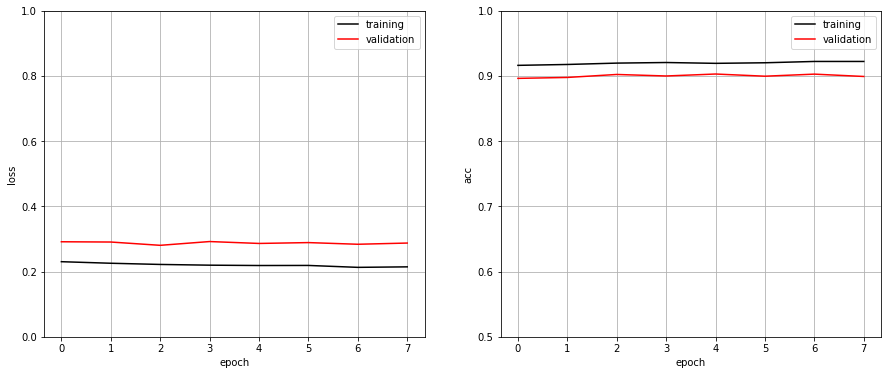

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

# プロット図のサイズを設定
plt.figure(figsize=(15, 6))
# プロット図を縮小して図の間のスペースを空ける
plt.subplots_adjust(wspace=0.2)

# 1*2のグリッドの左（1, 2, 2）の領域にプロット
plt.subplot(1, 2, 1)
# 訓練データの損失（誤り率）をプロット
plt.plot(
    history.history['loss'],
    label='training',
    color='black'
)
# 検証データの損失（誤り率）をプロット
plt.plot(
    history.history['val_loss'],
    label='validation',
    color='red'
)
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

# 1*2のグリッドの右（1, 2, 2）の領域にプロット
plt.subplot(1, 2, 2)
# 訓練データの正解率をプロット
plt.plot(
    history.history['accuracy'],
    label='training',
    color='black'
)
# 検証データの損失（誤り率）をプロット
plt.plot(
    history.history['val_accuracy'],
    label='validation',
    color='red'
)
plt.ylim(0.5, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

### TensorFlowスタイルによるCNNの構築

In [22]:
'''
1. データセットの読み込みと前処理
'''
import tensorflow as tf
from keras.utils import np_utils

# Fashion-MNISTデータセットをインポート
from tensorflow.keras.datasets import fashion_mnist

# MNISTデータセットの読み込み
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# 訓練データ
# (60000, 28, 28)の3階テンソルを(60000, 28, 28, 1)の4階テンソルに変換
x_train = x_train.reshape(-1, 28, 28, 1)
# 訓練データをfloat32に変換
x_train = x_train.astype('float32')
# データを255で割って0から1.0の範囲に変換
x_train /= 255
class_num = 10
# 正解ラベルをOne-Hot表現に変換
y_train = tf.keras.utils.to_categorical(y_train, class_num)

# テストデータ
# (60000, 28, 28)の3階テンソルを(60000, 28, 28, 1)の4階テンソルに変換
x_test = x_test.reshape(-1, 28, 28, 1)
# 訓練データをfloat32に変換
x_test = x_test.astype('float32')
# データを255で割って0から1.0の範囲に変換
x_test /= 255
# 正解ラベルをOne-Hot表現に変換
y_test = tf.keras.utils.to_categorical(y_test, class_num)

In [23]:
'''
2. モデルの定義
'''
class CNN(tf.keras.Model):
    '''
    畳み込みニューラルネットワーク
    Attributes:
        conv2D_1(Conv2D):　畳み込み層
        conv2D_2(Conv2D):　畳み込み層
        flatten(Flatten):　フラット化
        dropput1(Dropout):　ドロップアウト
        d1(Dense): 全結合層
    '''
    def __init__(self):
        super().__init__()
        # 畳み込み層1：活性化関数はRelu
        self.conv2D_1 = tf.keras.layers.Conv2D(
            filters=32,
            kernel_size=(3, 3),
            padding='same',
            input_shape=(28, 28, 1),
            activation='relu'
        )
        # 畳み込み層2：活性化関数はRelu
        self.conv2D_2 = tf.keras.layers.Conv2D(
            filters=64,
            kernel_size=(3, 3),
            padding='same',
            activation='relu'
        )

        # Flatten: (28, 28, 64)の出力を(50176),にフラット化
        self.flatten = tf.keras.layers.Flatten()
        # ドロップアウト
        self.dropput1 = tf.keras.layers.Dropout(0.5)
        # 出力層：活性化関数はソフトマックス
        self.d1 = tf.keras.layers.Dense(10, activation='softmax')
    
    @tf.function
    def call(self, x, training=None):
        '''
        CNNのインスタンスからコールバックされる関数
        Parameters:
            x(ndarray(float32)): 訓練データ、または検証データ
        Returns(float32): CNNの出力として要素数3の1階テンソル
        '''
        x = self.conv2D_1(x)
        x = self.conv2D_2(x)
        x = self.flatten(x)
        if training:
            x = self.dropput1(x)
        x = self.d1(x)
        return x

In [24]:
'''
3. 損失関数とオプティマイザーの生成
'''
# マルチクラス分類のクロスエントロピー誤差を求めるオブジェクト
loss_fn = tf.keras.losses.CategoricalCrossentropy()
# 勾配降下アルゴリズムを使用するオプティマイザーを生成
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

In [25]:
'''
4. 勾配降下アルゴリズムによるパラメーターの更新処理を行うtrain_step()関数
'''
# 損失を記録するオブジェクトを生成
train_loss = tf.keras.metrics.Mean()
# カテゴリカルデータの精度を記録するオブジェクトを生成
train_accuracy = tf.keras.metrics.CategoricalAccuracy()

@tf.function
def train_step(x, t):
    '''
    学習を1回行う
    Parameters:
        x(ndarray(float32)): 訓練データ
        t(ndarray(float32)): 正解ラベル
    Returns:
        ステップごとのクロスエントロピー誤差
    '''
    # 自動微分による勾配計算を記録するブロック
    with tf.GradientTape() as tape:
        # 訓練データをTrueに指定し
        # モデルに入力して順伝播の出力値を取得
        outputs = model(x, training=True)
        # 出力値と正解ラベルの誤差
        tmp_loss = loss_fn(t, outputs)
    
    # tapeに記録された操作を使用して誤差の勾配を計算
    grads = tape.gradient(
        # 現在のステップの誤差
        tmp_loss,
        # バイアス、重みのリストを取得
        model.trainable_variables
    )
    # 勾配降下法の更新式を適用してバイアス、重みを更新
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # 損失をMeanオブジェクトに記録
    train_loss(tmp_loss)
    # 精度をCategoricalAccuracyオブジェクトに記録
    train_accuracy(t, outputs)

In [26]:
'''
5. 検証を行うvalid_step()関数
'''
# 損失を記録するオブジェクトを生成
val_loss = tf.keras.metrics.Mean()
# カテゴリカルデータの精度を記録するオブジェクトを生成
val_accuracy = tf.keras.metrics.CategoricalAccuracy()

@tf.function
def valid_step(val_x, val_y):
    # 訓練データをFalseに指定し
    # モデルに入力して順伝播の出力値を取得
    pred = model(val_x, training=False)
    # 出力値と正解ラベルの誤差
    tmp_loss = loss_fn(val_y, pred)
    # 損失をMeanオブジェクトに記録
    val_loss(tmp_loss)
    # 精度をCategoricalAccuracyオブジェクトに記録
    val_accuracy(val_y, pred)

In [27]:
'''
6. 学習の進捗を監視し早期終了判定を行うクラス
'''
class EarlyStopping:
    def __init__(self, patience=1.0, verbose=0):
        '''
        Parameters:
            patience(int): 監視するエポック数
            verbose(int): 早期終了メッセージの出力フラグ
        '''
        # インスタンス変数の初期化
        # 監視中のエポック数のカウンターを初期化
        self.epoch = 0
        # 比較対象の損失を無限大'inf'で初期化
        self.pre_loss = float('inf')
        # 監視対象のエポック数をパラメータで初期化
        self.patience = patience
        # 早期終了メッセージの出力フラグをパラメータで初期化
        self.verbose = verbose
    
    def __call__(self, current_loss):
        '''
        Parameters:
            current_loss(float): 1エポック終了後の検証データの損失
        Returns:
            True: 監視回数の上限までに前エポックの損失を超えた場合
            False: 監視回数の上限までに前エポックの損失を超えない場合
        '''
        # 前エポックの損失より大きくなった場合
        if self.pre_loss < current_loss:
            # カウンターを1増やす
            self.epoch += 1
            # 監視回数の上限に達した場合
            if self.epoch > self.patience:
                # 早期終了メッセージの出力フラグが1の場合
                if self.verbose:
                    # メッセージを出力
                    print('early stopping')
                # 学習を終了するTrueを返す
                return True
        # 前エポックの損失以下の場合
        else:
            # カウンターを0に戻す
            self.epoch = 0
            # 損失の値を更新する
            self.pre_loss = current_loss
        
        # 監視回数の上限までに前エポックの損失を超えなければFalseを返して
        # 前エポックの損失を上回るが監視関数の範囲内であれば
        # Falseを返す必要があるので、return文の位置をここであることに注意
        return False

In [28]:
'''
7. 訓練データと検証データの用意
'''
from sklearn.model_selection import train_test_split

# 訓練データと検証データに8:2の割合で分割
tr_x, val_x, tr_y, val_y = train_test_split(x_train, y_train, test_size=0.2)
print(tr_x.shape)
print(val_x.shape)
print(tr_y.shape)
print(val_y.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(48000, 10)
(12000, 10)


In [29]:
'''
8. モデルを生成して学習する
'''
from sklearn.utils import shuffle

# エポック数
epochs = 100
# ミニバッチのサイズ
batch_size = 64
# 訓練データのステップ数
tr_steps = tr_x.shape[0] // batch_size
# 検証データのステップ数
val_steps = val_x.shape[0] // batch_size

# 隠れ層256ユニット、出力層10ユニットのモデルを生成
model = CNN()
# 損失と精度の履歴を保存するためにdictオブジェクト
history = {
    'loss': [],
    'accuracy': [],
    'val_loss': [],
    'val_accuracy': [],
}

# 早期終了の判定を行うオブジェクトを生成
ers = EarlyStopping(patience=5, verbose=1)

# 学習を行う
for epoch in range(epochs):
    # 学習するたびに記録された値をリセット
    train_loss.reset_states()
    train_accuracy.reset_states()
    val_loss.reset_states()
    val_accuracy.reset_states()

    # 訓練データと正解ラベルをシャッフル
    x_, y_ = shuffle(tr_x, tr_y, )

    # 1ステップにおける訓練用ミニバッチを使用した学習
    for step in range(tr_steps):
        start = step * batch_size
        end = start + batch_size
        # ミニバッチでバイアス、重みを更新して誤差を取得
        train_step(x_[start:end], y_[start:end])
    
    # 1ステップにおける検証用ミニバッチを使用した評価
    for step in range(val_steps):
        start = step * batch_size
        end = start + batch_size
        # ミニバッチでバイアス、重みを更新して誤差を取得
        valid_step(val_x[start:end], val_y[start:end])
    
    avg_train_loss = train_loss.result()
    avg_train_acc = train_accuracy.result()
    avg_val_loss = val_loss.result()
    avg_val_acc = val_accuracy.result()

    # 損失を履歴を保存する
    history['loss'].append(avg_train_loss)
    history['val_loss'].append(avg_val_loss)
    # 精度を履歴を保存する
    history['accuracy'].append(avg_train_acc)
    history['val_accuracy'].append(avg_val_acc)

    # 1エポックごとに結果を出力
    if (epoch + 1) % 1 == 0:
        print(
            'epoch({}) train_loss: {:.4} train_acc {:.4} val_loss {:.4} val_acc {:.4}'
            .format(
                epoch + 1,
                avg_train_loss,
                avg_train_acc,
                avg_val_loss,
                avg_val_acc,
            )
        )

    # 検証データの損失をEarlyStoppingオブジェクトに達して早期終了を判定
    if ers(val_loss.result()):
        # 監視対象のエポックで損失が改善されなければ学習を終了
        break
model.summary()

epoch(1) train_loss: 0.5484 train_acc 0.8114 val_loss 0.4736 val_acc 0.8334
epoch(2) train_loss: 0.3611 train_acc 0.8729 val_loss 0.3243 val_acc 0.8832
epoch(3) train_loss: 0.3149 train_acc 0.8883 val_loss 0.296 val_acc 0.8942
epoch(4) train_loss: 0.2854 train_acc 0.8979 val_loss 0.2768 val_acc 0.8986
epoch(5) train_loss: 0.2649 train_acc 0.9052 val_loss 0.2871 val_acc 0.8956
epoch(6) train_loss: 0.2475 train_acc 0.9123 val_loss 0.2623 val_acc 0.9052
epoch(7) train_loss: 0.2328 train_acc 0.9162 val_loss 0.2603 val_acc 0.9076
epoch(8) train_loss: 0.2199 train_acc 0.921 val_loss 0.2694 val_acc 0.9062
epoch(9) train_loss: 0.2097 train_acc 0.9242 val_loss 0.257 val_acc 0.9091
epoch(10) train_loss: 0.1945 train_acc 0.9295 val_loss 0.2541 val_acc 0.9098
epoch(11) train_loss: 0.1886 train_acc 0.9324 val_loss 0.2591 val_acc 0.9068
epoch(12) train_loss: 0.1803 train_acc 0.9339 val_loss 0.2476 val_acc 0.9148
epoch(13) train_loss: 0.172 train_acc 0.9377 val_loss 0.253 val_acc 0.9116
epoch(14) tra

### PyTorchによるCNNの構築

In [30]:
'''
1. データの読み込みと前処理
'''
import os
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# ダウンロード先のディレクトリ
root = './data'

# トランスフォーマーオブジェクトを生成
transform = transforms.Compose([
    transforms.ToTensor(), # Tensorオブジェクトに変換
    transforms.Normalize((0.5), (0.5)), # 平均0.5、標準偏差0.5に正規化
])

# 訓練用データの読み込み（60000セット）
f_mnist_train = datasets.FashionMNIST(
    root=root,
    download=True,
    train=True,
    transform=transform
)
# テスト用データの読み込み（10000セット）
f_mnist_test = datasets.FashionMNIST(
    root=root,
    download=True,
    train=False,
    transform=transform
)

# ミニバッチのサイズ
batch_size = 64
# 訓練用のデータローダー
train_dataloader = DataLoader(
    f_mnist_train,
    batch_size= batch_size,
    shuffle=True
)
# テスト用のデータローダー
test_dataloader = DataLoader(
    f_mnist_test,
    batch_size= batch_size,
    shuffle=False
)

# データローダーが返すミニバッチの先頭データの形状を出力
for (x, t) in train_dataloader:
    print(x.shape)
    print(t.shape)
    break

for (x, t) in test_dataloader:
    print(x.shape)
    print(t.shape)
    break

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [34]:
'''
2. モデルの定義
'''
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    '''
    畳み込みニューラルネットワーク
    '''
    def __init__(self, input_dim, hidden_dim, output_dim):
        '''
        モデルの初期化を行う
        '''
        # スーパークラスの__init__()を実行
        super().__init__()
        # 畳み込み層1
        self.conv1 = nn.Conv2d(
            in_channels=1,
            out_channels=32,
            kernel_size=3,
            padding=(1, 1),
            padding_mode='zeros'
        )
        self.dropout1 = nn.Dropout2d(0.5)

        # 畳み込み層2
        self.conv2 = nn.Conv2d(
            in_channels=32,
            out_channels=64,
            kernel_size=3,
            padding=(1, 1),
            padding_mode='zeros'
        )
        self.dropout2 = nn.Dropout2d(0.5)
    
        # 全結合層1
        self.fc1 = nn.Linear(in_features=28*28*64, out_features=128)
        self.dropout3 = nn.Dropout(0.5)
    
        # 全結合層2
        self.fc2 = nn.Linear(in_features=128, out_features=10)

    def forward(self, x):
        '''
        CNNの順伝播処理を行う
        Parameters:
            x(ndarray(float32)): 訓練データまたはテストデータ
        Returns(float32):
            出力層からの出力値
        '''
        x = F.relu(self.conv1(x))
        x = self.dropout1(x)
        x = F.relu(self.conv2(x))
        x = self.dropout2(x)
        x = x.view(-1, 28 * 28 * 64)

        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return x

In [35]:
'''
3. モデルの生成
'''
import torch
# 使用可能なデバイスを取得する
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# モデルオブジェクトを生成し、使用可能なデバイスを設定する
model = CNN(784, 256, 10).to(device)

model

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout1): Dropout2d(p=0.5, inplace=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=50176, out_features=128, bias=True)
  (dropout3): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [36]:
'''
4. 損失関数とオプティマイザーの生成
'''
import torch.optim

# クロスエントロピー誤差のオブジェクトを生成
criterion = nn.CrossEntropyLoss()
# 勾配降下アルゴリズムを使用するオプティマイザーを生成
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [37]:
'''
5. train_step()関数の定義
'''
def train_step(x, t):
    '''
    バックプロパゲーションによるパラメータ更新を行う
    Parameters:
        x: 訓練データ
        t: 正解ラベル
    Returns:
        MLPの出力と正解ラベルのクロスエントロピー誤差
    '''
    model.train()
    preds = model(x)
    loss = criterion(preds, t)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    return loss, preds

In [38]:
'''
6. test_step()関数の定義
'''
def test_step(x, t):
    '''
    テストデータを入力して損失と予測値を返す
    Paramters:
        x: テストデータ
        t: 正解ラベル
    Returns:
        MLPの出力と正解ラベルのクロスエントロピー誤差
    '''
    model.eval()
    preds = model(x)
    loss = criterion(preds, t)

    return loss, preds

In [39]:
'''
7. 学習の進捗を監視し早期終了判定を行うクラス
'''
class EarlyStopping:
    def __init__(self, patience=1.0, verbose=0):
        '''
        Parameters:
            patience(int): 監視するエポック数
            verbose(int): 早期終了メッセージの出力フラグ
        '''
        # インスタンス変数の初期化
        # 監視中のエポック数のカウンターを初期化
        self.epoch = 0
        # 比較対象の損失を無限大'inf''で初期化
        self.pre_loss = float('inf')
        # 監視対象のエポック数をパラメータで初期化
        self.patience = patience
        # 早期終了メッセージの出力フラグをパラメータで初期化
        self.verbose = verbose
    
    def __call__(self, current_loss):
        '''
        Parameters:
            current_loss(float): 1エポック終了後の検証データの損失
        Returns:
            True: 監視回数の上限までに前エポックの損失を超えた場合
            False: 監視回数の上限までに前エポックの損失を超えない場合
        '''
        # 前エポックの損失より大きくなった場合
        if self.pre_loss < current_loss:
            self.epoch += 1
            # 監視回数の上限に達した場合
            if self.epoch > self.patience:
                if self.verbose:
                    print('early stoopping')
                return True
        # 前エポックの損失以下の場合
        else:
            self.epoch = 0
            self.pre_loss = current_loss
        
        return False

In [41]:
%%time
'''
8. モデルを使用して学習する
'''
from sklearn.metrics import accuracy_score

# エポック数
epochs = 100
# 損失と精度の履歴を保存するためにdictオブジェクト
history = {
    'loss': [],
    'accuracy': [],
    'test_loss': [],
    'test_accuracy': [],
}
# 早期終了の判定を行うオブジェクトを生成
ers = EarlyStopping(patience=5, verbose=1)
# 学習を行う
for epoch in range(epochs):
    train_loss = 0.
    train_acc = 0.
    test_loss = 0.
    test_acc = 0.

    # 1ステップにおける訓練用ミニバッチを使用した学習
    for (x, t) in train_dataloader:
        # torch.Tensorオブジェクトにデバイス割り当てる
        x, t = x.to(device), t.to(device)
        loss, preds = train_step(x, t)
        train_loss += loss.item()
        train_acc += accuracy_score(
            t.tolist(),
            preds.argmax(dim=-1).tolist()
        )

    # 1ステップにおけるテストミニバッチを使用した学習
    for (x, t) in test_dataloader:
        # torch.Tensorオブジェクトにデバイス割り当てる
        x, t = x.to(device), t.to(device)
        loss, preds = test_step(x, t)
        train_loss += loss.item()
        train_acc += accuracy_score(
            t.tolist(),
            preds.argmax(dim=-1).tolist()
        )

    avg_train_loss = train_loss / len(train_dataloader)
    avg_train_acc = train_acc / len(train_dataloader)
    avg_test_loss = test_loss / len(test_dataloader)
    avg_test_acc = test_acc / len(test_dataloader)

    # 訓練データの履歴を保存する
    history['loss'].append(avg_train_loss)
    history['accuracy'].append(avg_train_acc)
    # テストデータの履歴を保存する
    history['test_loss'].append(avg_test_loss)
    history['test_accuracy'].append(avg_test_acc)

    # 1エポックごとに結果を出力
    if (epoch + 1) % 1 == 0:
        print(
            'epoch({}) train_loss: {:.4} train_acc: {:.4} val_loss: {:.4} val_loss: {:.4}'
            .format(
                epoch + 1,
                avg_train_loss,
                avg_train_acc,
                avg_test_loss,
                avg_test_acc,
            )
        )
    # テストデータの損失をEarlyStoppingオブジェクトに渡して早期終了を判定
    if ers(avg_test_loss):
        break

### プーリング

### TensorFlowスタイルによるプログラミング

In [42]:
'''
1. データセットの読み込みと前処理
'''
import tensorflow as tf
from keras.utils import np_utils

# Fashion-MNISTデータセットをインポート
from tensorflow.keras.datasets import fashion_mnist

# MNISTデータセットの読み込み
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# 訓練データ
# (60000, 28, 28)の3階テンソルを(60000, 28, 28, 1)の4階テンソルに変換
x_train = x_train.reshape(-1, 28, 28, 1)
# 訓練データをfloat32に変換
x_train = x_train.astype('float32')
# データを255で割って0から1.0の範囲に変換
x_train /= 255
class_num = 10
# 正解ラベルをOne-Hot表現に変換
y_train = tf.keras.utils.to_categorical(y_train, class_num)

# テストデータ
# (60000, 28, 28)の3階テンソルを(60000, 28, 28, 1)の4階テンソルに変換
x_test = x_test.reshape(-1, 28, 28, 1)
# 訓練データをfloat32に変換
x_test = x_test.astype('float32')
# データを255で割って0から1.0の範囲に変換
x_test /= 255
# 正解ラベルをOne-Hot表現に変換
y_test = tf.keras.utils.to_categorical(y_test, class_num)

In [43]:
'''
2. モデルの定義
'''
class CNN(tf.keras.Model):
    '''
    畳み込みニューラルネットワーク
    Attributes:
        conv2D_1(Conv2D):　畳み込み層
        conv2D_2(Conv2D):　畳み込み層
        pool1(MaxPooling2D):　プーリング層
        dropput1(Dropout):　ドロップアウト
        conv2D_3(Conv2D):　畳み込み層
        pool2(MaxPooling2D):　プーリング層
        dropput2(Dropout):　ドロップアウト
        flatten(Flatten):　フラット化
        d1(Dense): 全結合層
    '''
    def __init__(self):
        super().__init__()
        # 畳み込み層1：活性化関数はRelu
        self.conv2D_1 = tf.keras.layers.Conv2D(
            filters=32,
            kernel_size=(3, 3),
            padding='same',
            input_shape=(28, 28, 1),
            activation='relu'
        )
        # 畳み込み層2：活性化関数はRelu
        self.conv2D_2 = tf.keras.layers.Conv2D(
            filters=64,
            kernel_size=(3, 3),
            padding='same',
            activation='relu'
        )
        # プーリング層1
        self.pool1 = tf.keras.layers.MaxPool2D(
            pool_size=(2, 2)
        )
        # ドロップアウト1
        self.dropput1 = tf.keras.layers.Dropout(0.5)
        # 畳み込み層3：活性化関数はRelu
        self.conv2D_3 = tf.keras.layers.Conv2D(
            filters=64,
            kernel_size=(3, 3),
            padding='same',
            activation='relu'
        )
        # プーリング層2
        self.pool2 = tf.keras.layers.MaxPool2D(
            pool_size=(2, 2)
        )
        # ドロップアウト2
        self.dropput2 = tf.keras.layers.Dropout(0.5)

        # Flatten: (28, 28, 64)の出力を(50176),にフラット化
        self.flatten = tf.keras.layers.Flatten()
        # 出力層：活性化関数はソフトマックス
        self.fc1 = tf.keras.layers.Dense(10, activation='softmax')
    
    @tf.function
    def call(self, x, training=None):
        '''
        CNNのインスタンスからコールバックされる関数
        Parameters:
            x(ndarray(float32)): 訓練データ、または検証データ
        Returns(float32): CNNの出力として要素数3の1階テンソル
        '''
        x = self.conv2D_1(x)
        x = self.pool1(self.cont2D_2(x))
        if training:
            x = self.dropput1(x)
        x = self.pool2(self.cont2D_3(x))
        if training:
            x = self.dropput2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        return x

### Kerasスタイルでプーリングを実装したCNNを構築する

In [44]:
'''
2. モデルの構築
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import SGD

model = Sequential()

# 畳み込み層1
model.add(
    Conv2D(
        filters=64,
        kernel_size=(3, 3),
        padding='same',
        input_shape=(28, 28, 1),
        activation='relu'
    )
)
# 畳み込み層2
model.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        padding='same',
        input_shape=(28, 28, 1),
        activation='relu'
    )
)
# プーリング層1
model.add(
    MaxPooling2D(pool_size=(2, 2))
)
# ドロップアウト
model.add(Dropout(0.5))
# 畳み込み層3
model.add(
    Conv2D(
        filters=64,
        kernel_size=(3, 3),
        padding='same',
        input_shape=(14, 14, 1),
        activation='relu'
    )
)
# プーリング層2
model.add(
    MaxPooling2D(pool_size=(2, 2))
)
# ドロップアウト
model.add(Dropout(0.5))

# Flatten: (7, 7, 64)の出力を(3136,)にフラット化
model.add(Flatten())
# 出力層
model.add(Dense(
    10,
    activation='softmax'
))

# オブジェクトのコンパイル
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=SGD(lr=0.1),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


### PyTorchによるプーリングを実装したCNNの構築

In [45]:
'''
2. モデルの定義
'''
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    '''
    畳み込みニューラルネットワーク
    '''
    def __init__(self, input_dim, hidden_dim, output_dim):
        '''
        モデルの初期化を行う
        '''
        # スーパークラスの__init__()を実行
        super().__init__()
        # 畳み込み層1
        self.conv1 = nn.Conv2d(
            in_channels=1,
            out_channels=32,
            kernel_size=3,
            padding=(1, 1),
            padding_mode='zeros'
        )
        # プーリング2*2
        self.pool1 = nn.MaxPool2d(2, 2)

        # 畳み込み層2
        self.conv2 = nn.Conv2d(
            in_channels=32,
            out_channels=64,
            kernel_size=3,
            padding=(1, 1),
            padding_mode='zeros'
        )
        # プーリング2*2
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv2_drop = nn.Dropout2d(0.5)
    
        # 全結合層1
        self.fc1 = nn.Linear(in_features=7*7*64, out_features=128)
        self.fc_drop = nn.Dropout(0.5)
    
        # 全結合層2
        self.fc2 = nn.Linear(in_features=128, out_features=10)

    def forward(self, x):
        '''
        CNNの順伝播処理を行う
        Parameters:
            x(ndarray(float32)): 訓練データまたはテストデータ
        Returns(float32):
            出力層からの出力値
        '''
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.conv2_drop(x)
        x = x.view(-1, 7 * 7 * 64)
        x = F.relu(self.fc1(x))
        x = self.fc_drop(x)

        x = self.fc2(x)
        return x